In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
X_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


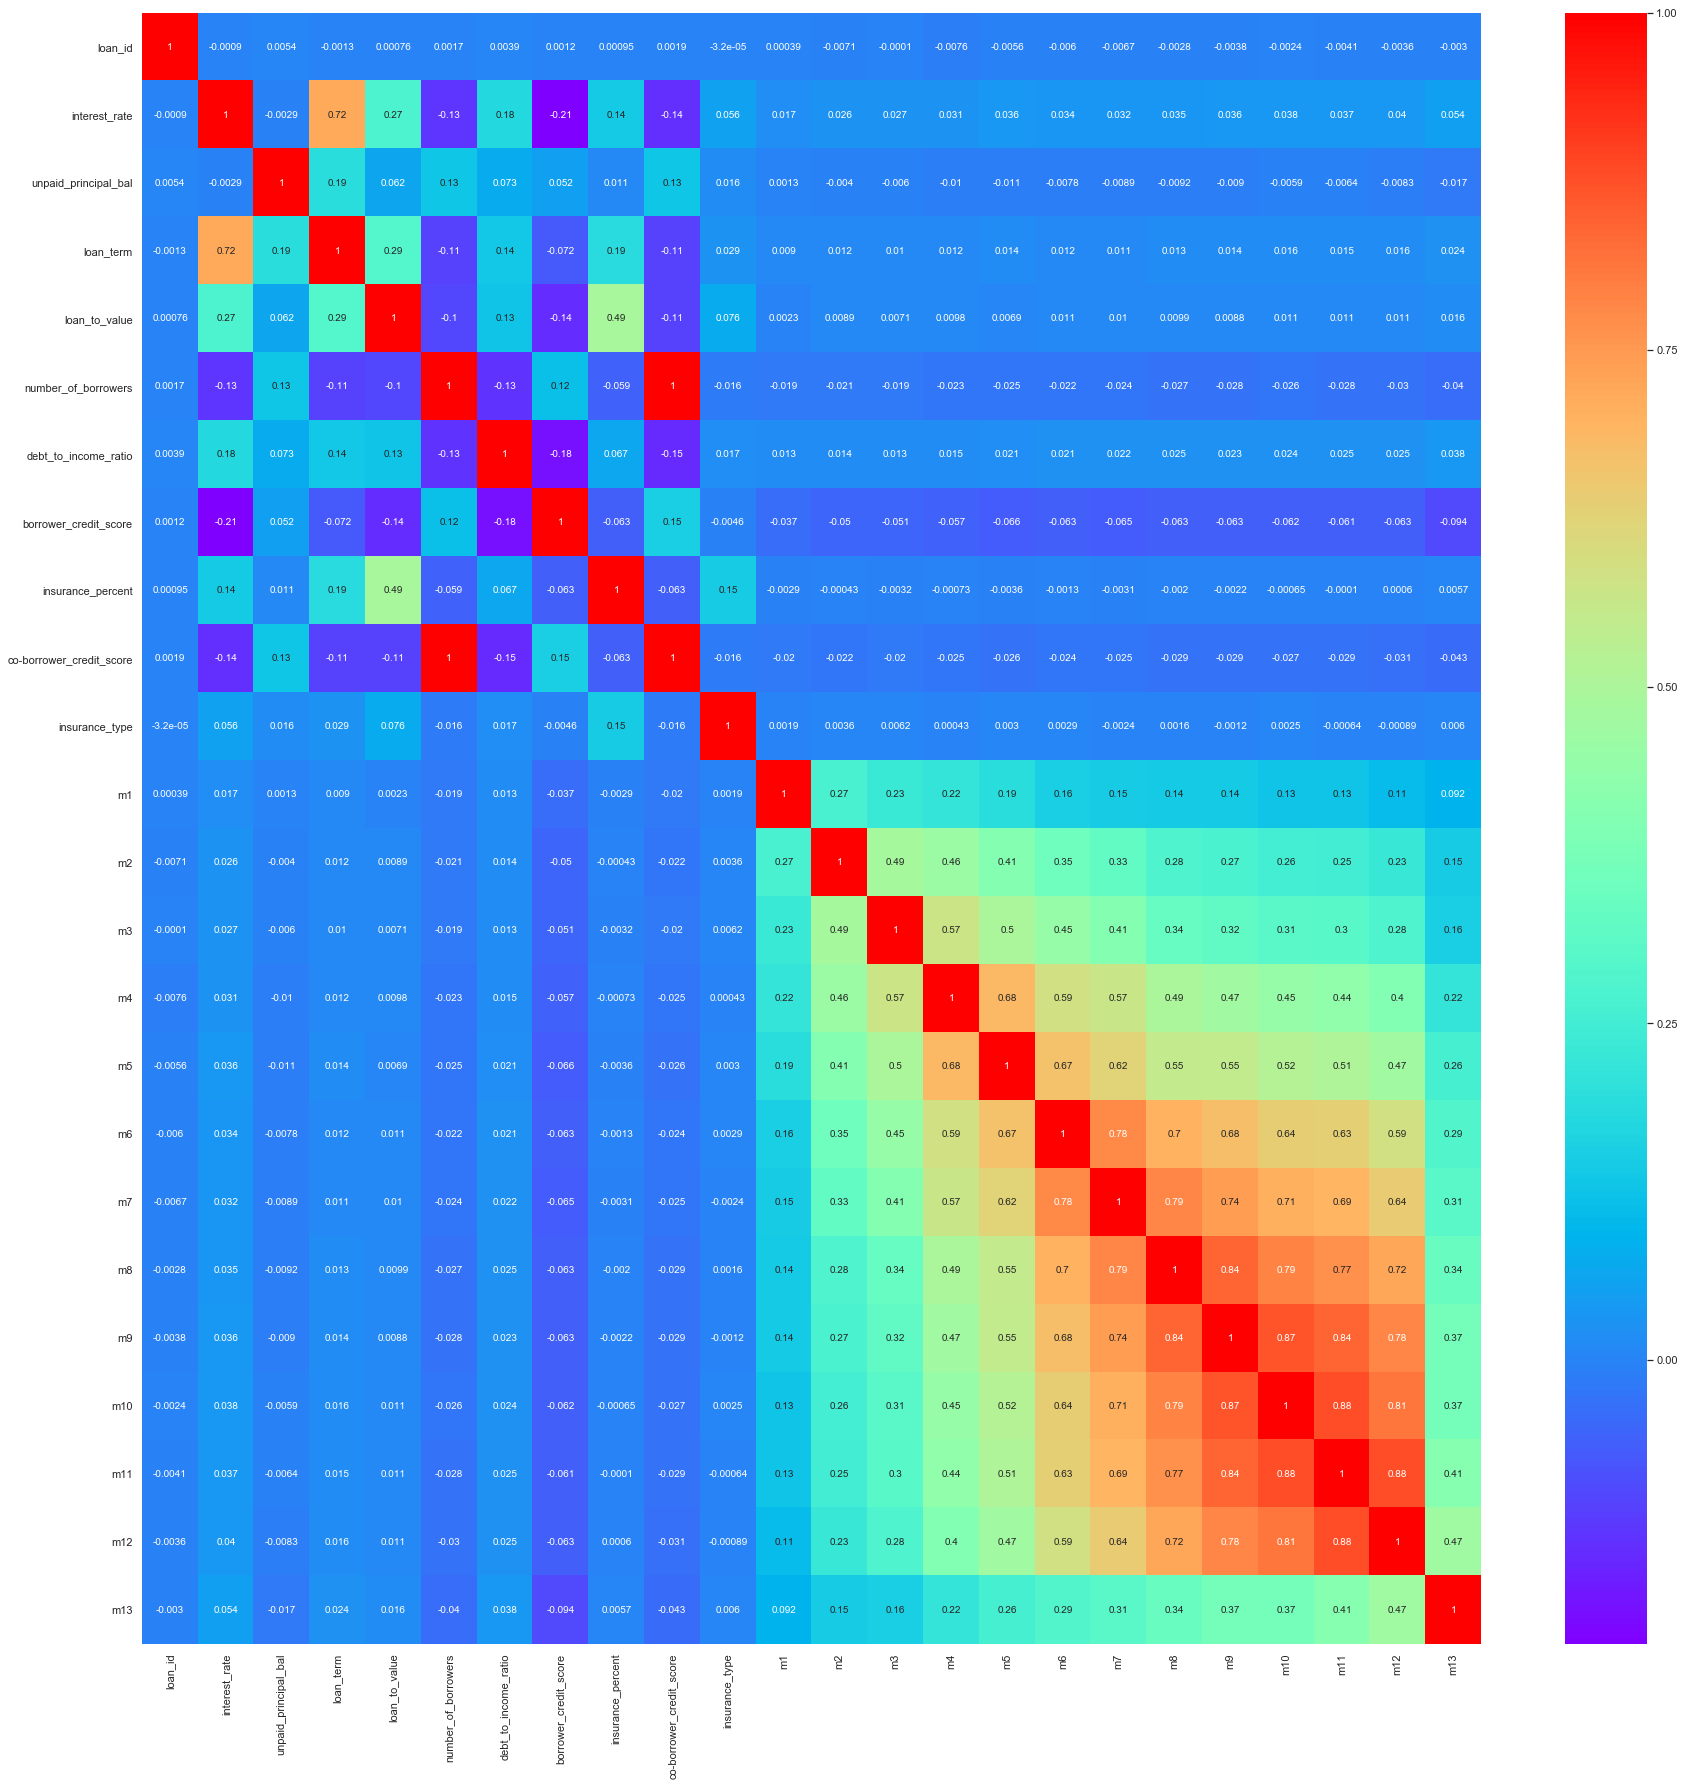

In [4]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot=True,cmap="rainbow")

In [5]:
X_train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [6]:
X_train["origination_date"] = pd.to_datetime(X_train["origination_date"])
X_test["origination_date"] = pd.to_datetime(X_test["origination_date"])

In [7]:
X_train["first_payment_date"] = pd.to_datetime(X_train["first_payment_date"])
X_test["first_payment_date"] = pd.to_datetime(X_test["first_payment_date"],format='%b-%y')

In [8]:
X_train["m13"].unique()

array([1, 0], dtype=int64)

In [9]:
X_train["Gap_in_days"] = ( X_train["first_payment_date"]-X_train["origination_date"]).dt.days
X_test["Gap_in_days"] = ( X_test["first_payment_date"]-X_test["origination_date"]).dt.days

In [10]:
X_train.drop(["loan_id","origination_date","first_payment_date"],axis = 1,inplace=True)
load_ids = X_test["loan_id"]
X_test.drop(["loan_id","origination_date","first_payment_date"],axis = 1,inplace=True)

In [11]:
X_train.drop(["financial_institution"],axis = 1,inplace=True)
X_test.drop(["financial_institution"],axis = 1,inplace=True)

In [12]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [13]:
object_cols

['source', 'loan_purpose']

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [15]:
labelencoder_x = LabelEncoder()
for cols in object_cols:
    X_train[cols] = labelencoder_x.fit_transform(X_train[cols])
    X_test[cols] = labelencoder_x.fit_transform(X_test[cols])


In [16]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))


In [17]:
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

In [18]:
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [19]:
corrmat = pd.DataFrame(OH_X_train).corr()

In [20]:
X_train_values = OH_X_train.drop("m13", axis = 1).values
y_train = OH_X_train["m13"].values

In [21]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 115422, 1: 636}

In [22]:
X_train_values.shape

(116058, 29)

In [23]:
sc_X=StandardScaler()
OH_X_train=sc_X.fit_transform(X_train_values)
OH_X_test = sc_X.fit_transform(OH_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
OH_X_train.shape

(116058, 29)

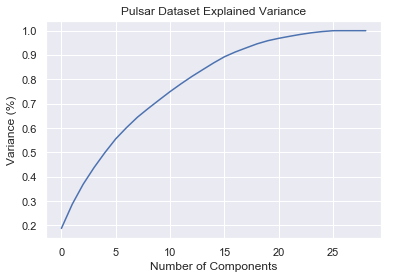

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(OH_X_train)
x_test = pca.fit_transform(OH_X_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [26]:
pca = PCA(n_components=25)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)


In [27]:
x_train.shape

(116058, 25)

In [28]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [29]:
from sklearn.metrics import f1_score,classification_report

x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size=0.20, random_state=56,shuffle = True)

eval_set=[(x_valid, y_valid)]

classifier_logi = LogisticRegression()
classifier_logi.fit(x_train,y_train)

accuracy = cross_val_score(estimator=classifier_logi, X=x_train, y=y_train,cv=10)

y_pred = classifier_logi.predict(x_valid)

print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

import xgboost as xgb

y_pred = classifier_logi.predict(x_test)

ltv_xgb_model = xgb.XGBClassifier(
 learning_rate =0.07,
 n_estimators=1200,
 max_depth=6,
 min_child_weight=3,
 gamma=10,
 subsample=0.6,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,

 seed=27)
ltv_xgb_model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=eval_set, verbose=True)
--best model so far

ltv_xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
       learning_rate=0.07, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=9696,
       silent=None, subsample=1, verbosity=1)


ltv_xgb_model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=eval_set, verbose=True)

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

params={
 "learning_rate"    : [0.05,0.07,0.08,0.09, 0.1, 0.15 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [1,6],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [500,800,1000,1200] 
}

classifier = xgb.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=6,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(x_train,y_train)

random_search.best_estimator_

ltv_xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=1,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=7, missing=None, n_estimators=1200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)
ltv_xgb_model.fit(x_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

y_pred = ltv_xgb_model.predict(x_valid)

print(classification_report(y_valid,y_pred))

f1_score(b_valid,y_pred)

'''unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))'''

'''final_sub=pd.DataFrame(load_ids)'''


'''final_sub["m13"] = pd.DataFrame(y_pred)'''

'''final_sub.head()'''

In [30]:
logisitic = LogisticRegressionCV(max_iter=1000,cv=10,random_state=966,n_jobs=-1)
logisitic.fit(x_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=966,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

cross_val_score(logisitic,x_train,y_train,cv=5)

y_pred = logisitic.predict(x_valid)

'''final_sub.to_csv("final_submission.csv")'''

rfc = RandomForestClassifier(n_estimators=1000,min_samples_leaf=50,max_depth=20,max_features='sqrt',n_jobs=-1,random_state=56)

rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_valid)

print(classification_report(y_valid,y_pred))

x_test.shape

In [31]:
final_pred  = logisitic.predict(x_test)
unique, counts = np.unique(final_pred, return_counts=True)
dict(zip(unique, counts))

{0: 35764, 1: 102}

In [32]:
final_sub=pd.DataFrame(load_ids)

In [33]:
final_sub["m13"] = pd.DataFrame(final_pred)

In [34]:
final_sub.to_csv("final_submission.csv")

rfc = RandomForestClassifier(n_estimators=500,max_depth=4,max_features=0.7,n_jobs=-1,random_state=4555)

rfc.fit(x_train,y_train)

cross_val_score(rfc,x_train,y_train,cv=10)

y_pred = rfc.predict(x_valid)

print(classification_report(y_valid,y_pred))

final_pred  = rfc.predict(x_test)
unique, counts = np.unique(final_pred, return_counts=True)
dict(zip(unique, counts))